# Stock Market Prediction Model

## Imports

In [ ]:
import numpy as np
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM

## Getting the company data from yahoo-finance

In [3]:
TickerName="INTC"
ticker=yf.Ticker(TickerName)
df=ticker.history(ticker,start='2005-01-01',end='2017-06-30')
# df.head()

# Writing the data to a csv

df.to_csv("Data.csv")

# reading the csv file

df=pd.read_csv("Data.csv")
df=df.iloc[:,1:2]
# df.head()

## Pre-processing of Data

In [4]:
# Feature scaling of the data

scaler = MinMaxScaler(feature_range = (0, 1))
TrainingData = scaler.fit_transform(df)

In [5]:
# Previous Day
x_train = TrainingData[0:len(TrainingData)-1]

# Next Day
y_train = TrainingData[1:len(TrainingData)]


# print(x_train[1])
# print(y_train[0])



In [6]:
# Reshaping Data

x_train = np.reshape(x_train, (len(x_train), 1, 1))

# print(x_train.shape)

## Creating the LSTM Model

In [7]:
model=Sequential([
    LSTM(units = 4, activation = 'sigmoid', input_shape = (None, 1)), #Input Layer
    Dense(units=1)
])

model.compile(optimizer = 'adam', loss = 'mean_squared_error')

# Fitting the model to our data
model.fit(x_train,y_train,batch_size=32,epochs=200)

Epoch 1/200
99/99 [==============================] - 10s 7ms/step - loss: 1.0055
Epoch 2/200
99/99 [==============================] - 1s 7ms/step - loss: 0.6056
Epoch 3/200
99/99 [==============================] - 1s 7ms/step - loss: 0.3563
Epoch 4/200
99/99 [==============================] - 1s 9ms/step - loss: 0.2079
Epoch 5/200
99/99 [==============================] - 1s 6ms/step - loss: 0.1251
Epoch 6/200
99/99 [==============================] - 1s 7ms/step - loss: 0.0834
Epoch 7/200
99/99 [==============================] - 1s 13ms/step - loss: 0.0641
Epoch 8/200
99/99 [==============================] - 1s 12ms/step - loss: 0.0559
Epoch 9/200
99/99 [==============================] - 1s 12ms/step - loss: 0.0526
Epoch 10/200
99/99 [==============================] - 2s 20ms/step - loss: 0.0510
Epoch 11/200
99/99 [==============================] - 1s 10ms/step - loss: 0.0500
Epoch 12/200
99/99 [==============================] - 1s 8ms/step - loss: 0.0492
Epoch 13/200
99/99 [===========

99/99 [==============================] - 1s 10ms/step - loss: 1.4463e-04
Epoch 195/200
99/99 [==============================] - 1s 11ms/step - loss: 1.4378e-04
Epoch 196/200
99/99 [==============================] - 1s 8ms/step - loss: 1.4423e-04
Epoch 197/200
99/99 [==============================] - 1s 8ms/step - loss: 1.4449e-04
Epoch 198/200
99/99 [==============================] - 1s 5ms/step - loss: 1.4357e-04
Epoch 199/200
99/99 [==============================] - 1s 5ms/step - loss: 1.4540e-04
Epoch 200/200
99/99 [==============================] - 1s 5ms/step - loss: 1.4357e-04


## Loading Testset

In [9]:
dfTest=ticker.history(ticker,start='2017-07-01',end='2021-01-01')
# df.head()

# Writing the data to a csv

dfTest.to_csv("DataTest.csv")

# reading the csv file

df=pd.read_csv("DataTest.csv")
df=df.iloc[:,1:2]
dfTest = scaler.fit_transform(df)
dfTest = np.reshape(dfTest, (len(dfTest), 1, 1))

predictions = model.predict(dfTest)
predictions = scaler.inverse_transform(predictions)
# df.head()


28/28 [==============================] - 1s 6ms/step


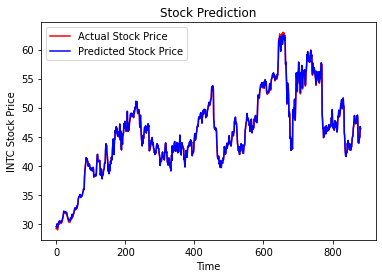

In [10]:
# Reshaping data before plotting


plt.plot(df, color = 'red', label = 'Actual Stock Price')
plt.plot(predictions, color = 'blue', label = 'Predicted Stock Price')
plt.title('Stock Prediction')
plt.xlabel('Time')
plt.ylabel('INTC Stock Price')
plt.legend()
plt.show()

## Evaluation Of the Model / Calculating errors

In [11]:
import math
from sklearn.metrics import mean_squared_error

rmse = math.sqrt(mean_squared_error(df, predictions))

print(rmse)

0.11866389782966268


## Real World Prediction

In [17]:
data=ticker.history(ticker,start='2022-09-06',end='2022-09-08')

data.to_csv("DataTest2.csv")

data=pd.read_csv("DataTest2.csv")
data=data.iloc[:,1:2]
# data
data = scaler.fit_transform(data)
data = np.reshape(data, (len(data), 1, 1))

# 2022-10-07 <--> 26.17

PREDICTION=model.predict(data)
PREDICTION = scaler.inverse_transform(PREDICTION)
print(PREDICTION)

1/1 [==============================] - 0s 47ms/step
[[31.377457]
 [30.429552]]


In [16]:
data=ticker.history(ticker,start='2022-09-06',end='2022-09-11')
data

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2022-09-06 00:00:00-04:00,31.389999,31.389999,30.330000,30.360001,46989600,0,0
2022-09-07 00:00:00-04:00,30.420000,30.790001,30.049999,30.650000,37329500,0,0
2022-09-08 00:00:00-04:00,30.370001,30.850000,29.910000,30.750000,37359500,0,0
2022-09-09 00:00:00-04:00,31.190001,31.500000,31.080000,31.459999,34069500,0,0


In [18]:
data=ticker.history(ticker,start='2022-09-06',end='2022-09-08')
data

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2022-09-06 00:00:00-04:00,31.389999,31.389999,30.330000,30.360001,46989600,0,0
2022-09-07 00:00:00-04:00,30.420000,30.790001,30.049999,30.650000,37329500,0,0
